In [34]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [35]:

df_wine = pd.read_excel('wine.xlsx')

In [36]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [37]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [38]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000
mean,8.311111,3.210197,0.268364,2.532152,0.086933,15.615486,45.914698,8.749956e+12,3.311015,0.657708,2.253485e+13,5.657043,804.969379
std,1.747595,52.272796,0.196686,1.355917,0.047267,10.250486,32.782130,2.958210e+14,0.156664,0.170399,5.183310e+14,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,9.900700e-01,2.740000,0.330000,8.400000e+00,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,9.955700e-01,3.205000,0.550000,9.500000e+00,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,9.966800e-01,3.310000,0.620000,1.020000e+01,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,9.978450e-01,3.400000,0.730000,1.120000e+01,6.000000,1209.500000
max,15.900000,1035.000000,1.000000,15.500000,0.611000,68.000000,289.000000,1.000120e+16,4.010000,2.000000,1.356667e+16,8.000000,1597.000000


In [39]:
pd.unique(df_wine['quality'])

array([5, 6, 7, 4, 8, 3])

In [40]:
df_wine['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [41]:
x=df_wine.iloc[:,0:11].values
y=df_wine.iloc[:,[11]].values

In [42]:
y=y.reshape(len(y),)

In [43]:
y

array([5, 5, 5, ..., 5, 6, 5], shape=(1143,))

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x= scaler.fit_transform(x)

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn=KNeighborsClassifier(n_neighbors=7,metric='euclidean').fit(x_train,y_train)
knn

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [48]:
y_prediksi=knn.predict(x_test)

In [49]:
y_prediksi

array([5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6,
       5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6,
       5, 6, 5, 7, 5, 5, 6, 6, 5, 7, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5,
       7, 5, 7, 6, 6, 6, 6, 7, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5,
       5, 8, 7, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 7, 5, 6, 5, 6, 6, 6, 5,
       6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 7, 5, 5, 5, 5, 7, 5,
       5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6,
       5, 5, 6, 7, 5, 7, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6,
       6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 7, 5, 5, 6, 6, 5, 6, 6,
       5, 5, 6, 7, 6, 6, 5, 6, 6, 5, 6, 5, 7, 6, 6, 5, 5, 5, 6, 6, 5, 7,
       5, 6, 5, 5, 5, 6, 7, 6, 5])

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [51]:
print("nilai akurasi",accuracy_score(y_test,y_prediksi))

nilai akurasi 0.537117903930131


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.58      0.62      0.60       100
           6       0.51      0.59      0.55        92
           7       0.44      0.26      0.33        27
           8       0.00      0.00      0.00         2

    accuracy                           0.54       229
   macro avg       0.26      0.24      0.25       229
weighted avg       0.51      0.54      0.52       229



c:\Users\Krisna\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Krisna\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Krisna\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

<Axes: >

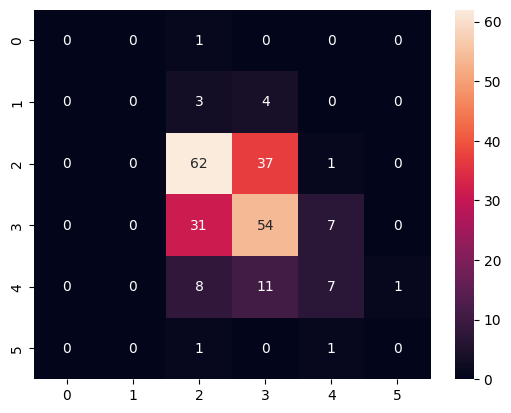

In [52]:
print(classification_report(y_test,y_prediksi))
sb.heatmap(confusion_matrix(y_test,y_prediksi),annot=True)

In [ ]:
n_akurasi = []
for k in range (1,20):
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean').fit(x_train,y_train)
    y_prediksi = knn.predict(x_test)
    akurasi = accuracy_score(y_test,y_prediksi)
    n_akurasi.append(akurasi)
print(n_akurasi)

[0.5633187772925764, 0.5458515283842795, 0.5065502183406113, 0.5065502183406113, 0.5633187772925764, 0.5764192139737991, 0.537117903930131, 0.5633187772925764, 0.5676855895196506, 0.5720524017467249, 0.5458515283842795, 0.537117903930131, 0.5676855895196506, 0.5545851528384279, 0.5545851528384279, 0.5545851528384279, 0.5720524017467249, 0.5720524017467249, 0.5764192139737991]


In [ ]:
k_terbaik = n_akurasi.index(max(n_akurasi)) 
akurasi_terbaik = max(n_akurasi)

print(f"\nK terbaik adalah {k_terbaik} dengan akurasi {akurasi_terbaik:.4f}")


K terbaik adalah 6 dengan akurasi 0.5764


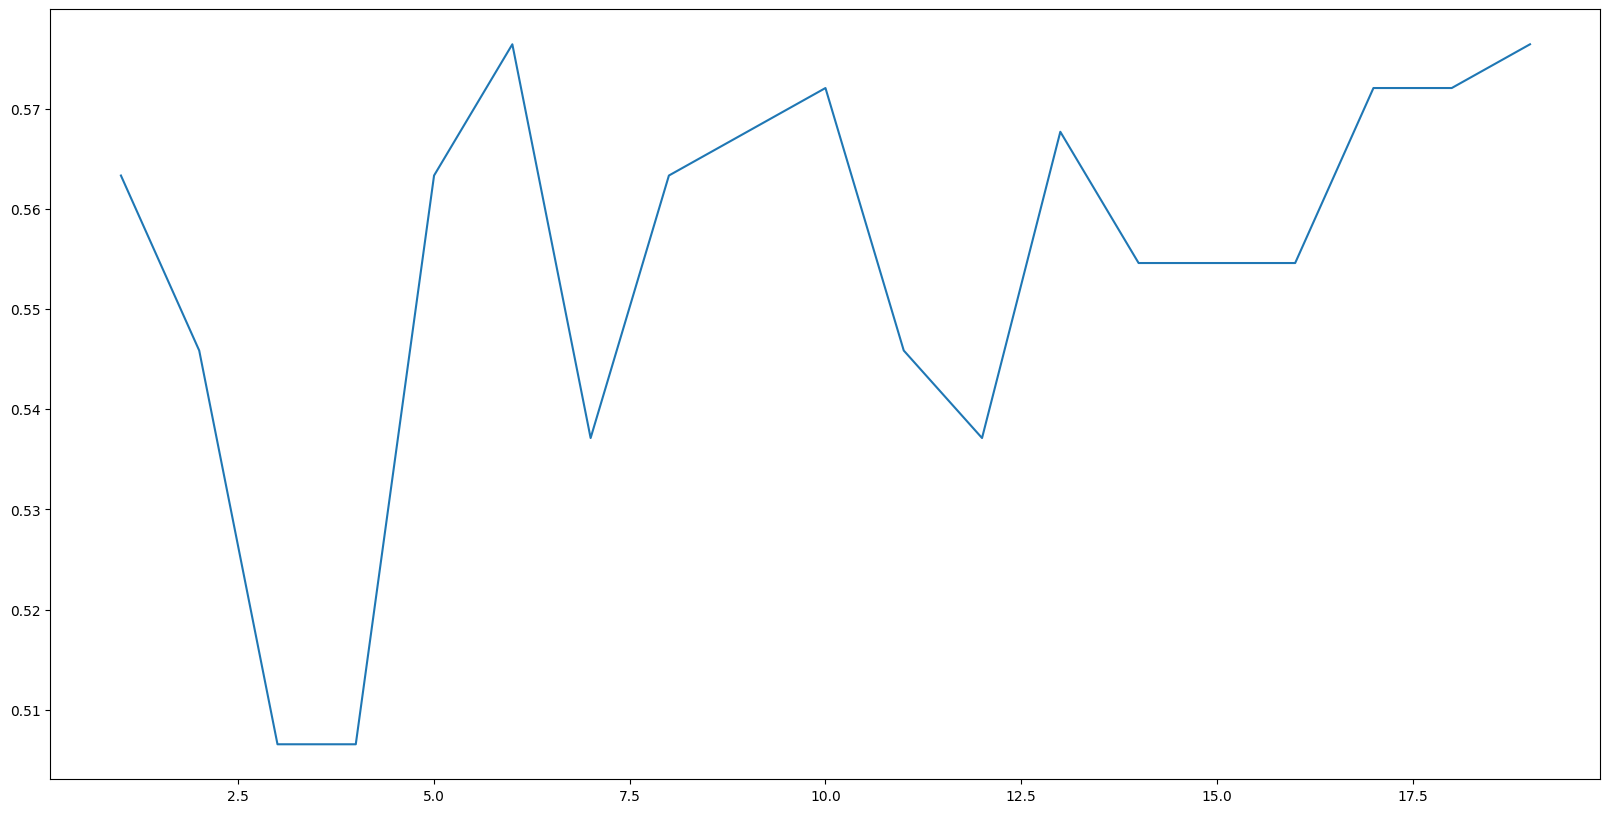

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(range(1,20),n_akurasi)
plt.show()

In [57]:
new_data=[[7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4]]
new_pred=knn.predict(new_data)
print(new_pred)

[5]
